In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
from IPython.display import display 
from sklearn.feature_extraction.text import CountVectorizer 
import missingno as msno_plot


from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer, RobustScaler

from imblearn.over_sampling import SMOTE
import collections
from pandas_profiling import ProfileReport
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

wine_df = pd.read_csv('Dry_Bean_Dataset.csv',sep=',')

In [2]:
font = {'family' : "serif", 'color': 'darkred', 'weight':'normal', 'size':12,}

In [3]:
wine_df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
wine_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.28,29324.10,20420.00,36328.00,44652.00,61332.00,254616.00
Perimeter,13611.0,855.28,214.29,524.74,703.52,794.94,977.21,1985.37
MajorAxisLength,13611.0,320.14,85.69,183.60,253.30,296.88,376.50,738.86
MinorAxisLength,13611.0,202.27,44.97,122.51,175.85,192.43,217.03,460.20
AspectRation,13611.0,1.58,0.25,1.02,1.43,1.55,1.71,2.43
Eccentricity,13611.0,0.75,0.09,0.22,0.72,0.76,0.81,0.91
ConvexArea,13611.0,53768.20,29774.92,20684.00,36714.50,45178.00,62294.00,263261.00
EquivDiameter,13611.0,253.06,59.18,161.24,215.07,238.44,279.45,569.37
Extent,13611.0,0.75,0.05,0.56,0.72,0.76,0.79,0.87
Solidity,13611.0,0.99,0.00,0.92,0.99,0.99,0.99,0.99


In [5]:
wine_df.describe().T.style.bar(subset=['mean'], color='#205fA2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='PuOr')

,count,mean,std,min,25%,50%,75%,max
Area,13611.000000,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.000000,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.000000,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.000000,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.000000,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.000000,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.000000,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.000000,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.000000,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.000000,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


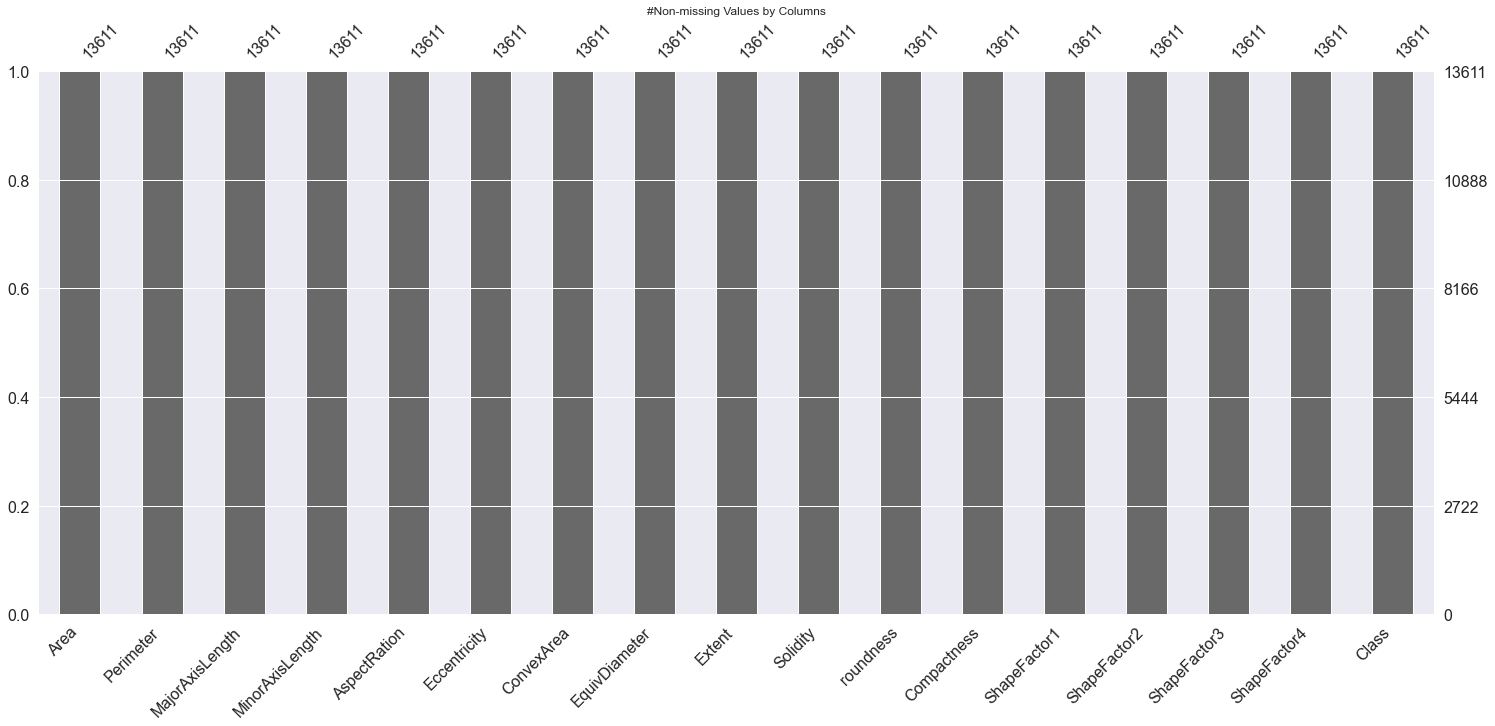

In [6]:
#-------------------------------------------Barplot of non-missing values--------------------------------
plt.title('#Non-missing Values by Columns')
msno_plot.bar(wine_df);

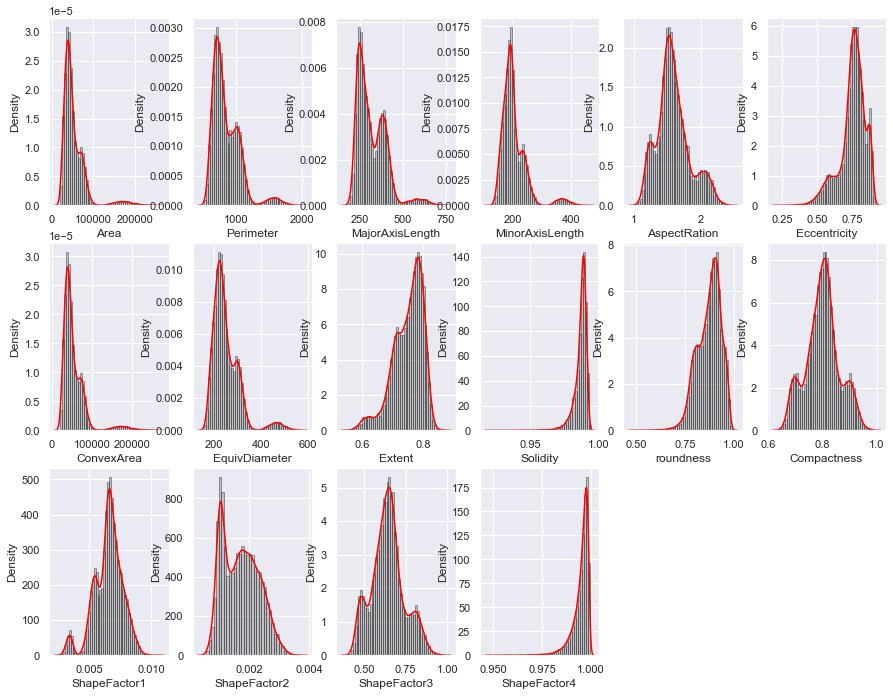

In [7]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
cnt = 1
for col in cols :
    plt.subplot(5,6,cnt)
    sns.distplot(wine_df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

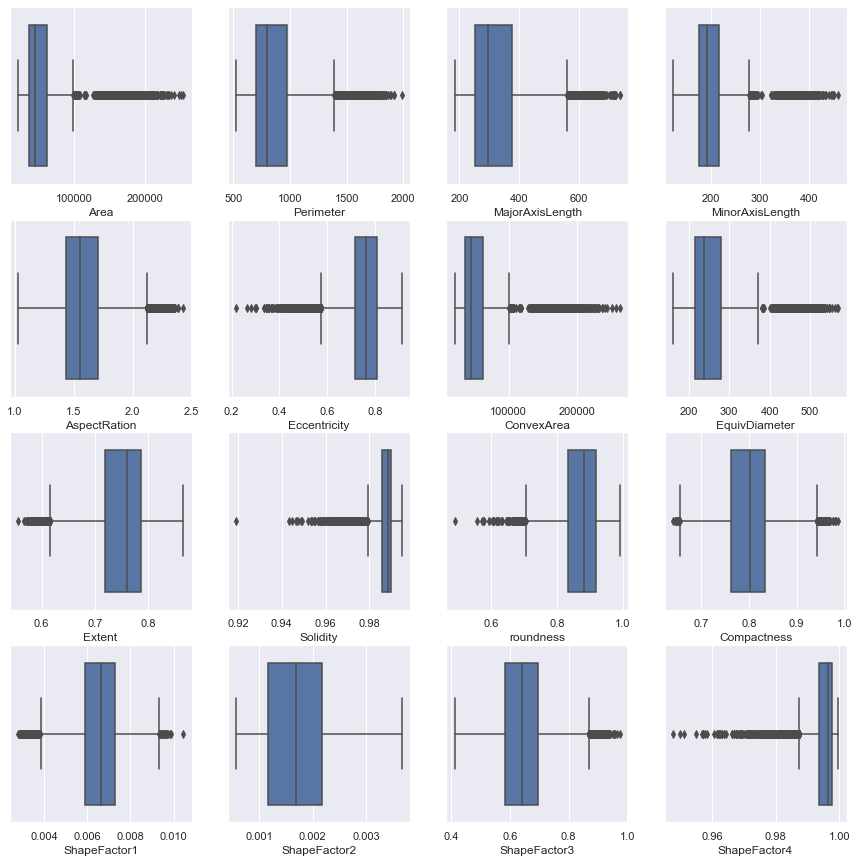

In [8]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in wine_df.columns[:-1]:
    plt.subplot(4, 4, pos)
    sns.boxplot(wine_df[i])
    pos += 1

In [9]:
col_names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
display(col_names)
for i in col_names:
    q1, q2, q3 = wine_df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    wine_df[i]=wine_df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

In [10]:
len(wine_df)

13611

In [11]:
wine_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,50173.34,18805.91,20420.00,36328.00,44652.00,61332.00,98838.00
Perimeter,13611.0,847.65,188.98,524.74,703.52,794.94,977.21,1387.75
MajorAxisLength,13611.0,318.57,80.33,183.60,253.30,296.88,376.50,561.28
MinorAxisLength,13611.0,198.58,32.74,122.51,175.85,192.43,217.03,278.81
AspectRation,13611.0,1.58,0.24,1.02,1.43,1.55,1.71,2.12
Eccentricity,13611.0,0.75,0.08,0.57,0.72,0.76,0.81,0.91
ConvexArea,13611.0,50874.54,19191.29,20684.00,36714.50,45178.00,62294.00,100663.25
EquivDiameter,13611.0,249.50,47.36,161.24,215.07,238.44,279.45,376.01
Extent,13611.0,0.75,0.05,0.62,0.72,0.76,0.79,0.87
Solidity,13611.0,0.99,0.00,0.98,0.99,0.99,0.99,0.99


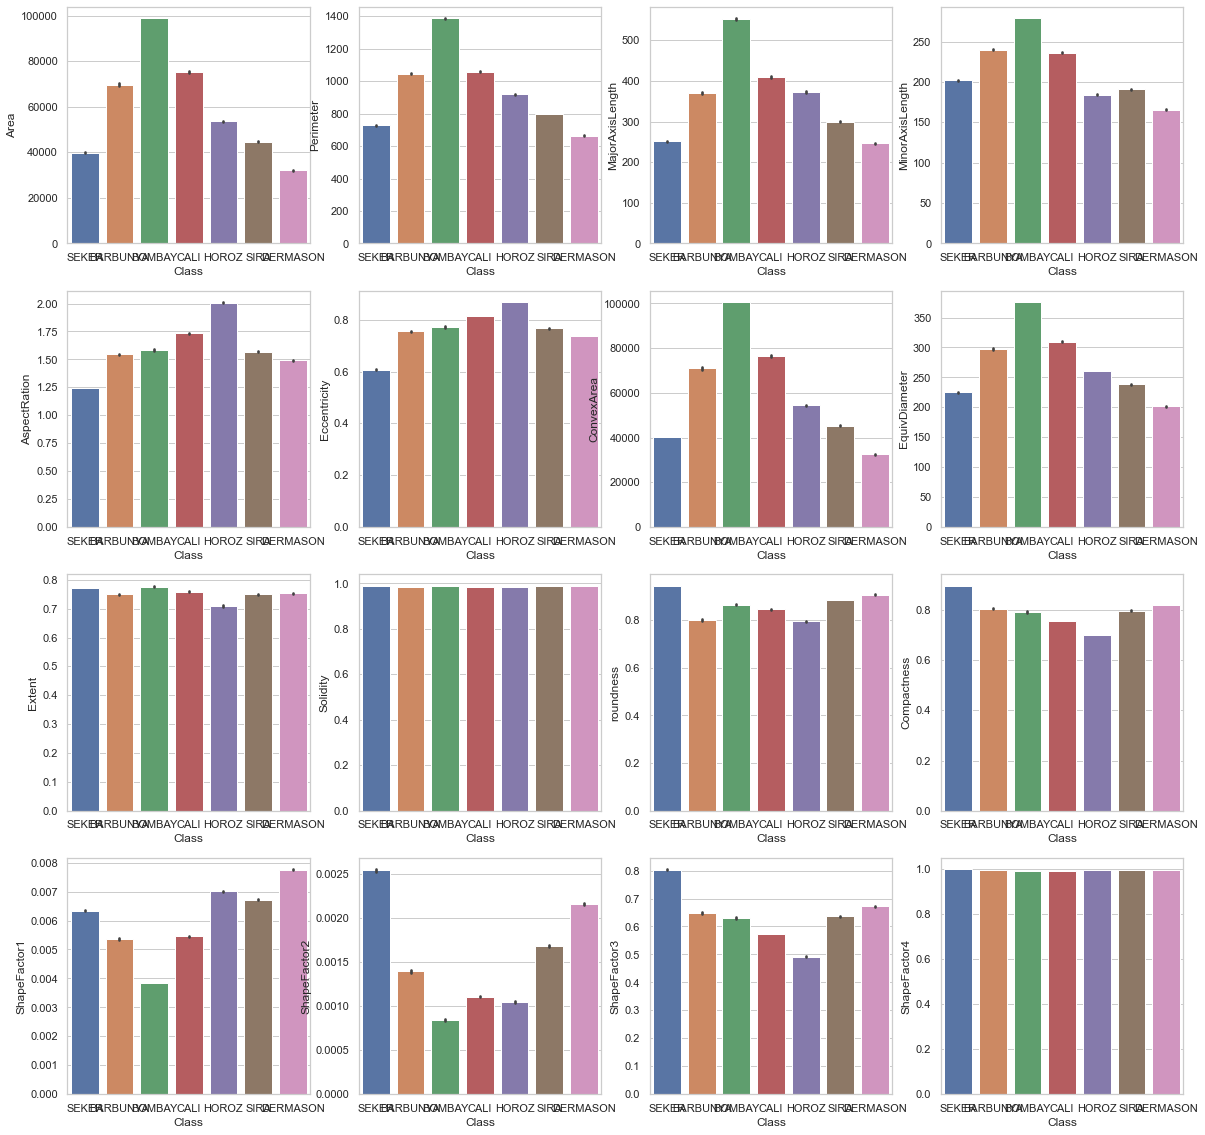

In [12]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [20,20])
cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
cnt = 1
for col in cols :
    plt.subplot(4,4,cnt)
    sns.barplot(data = wine_df, x = 'Class', y = col)
    cnt+=1
plt.show()  

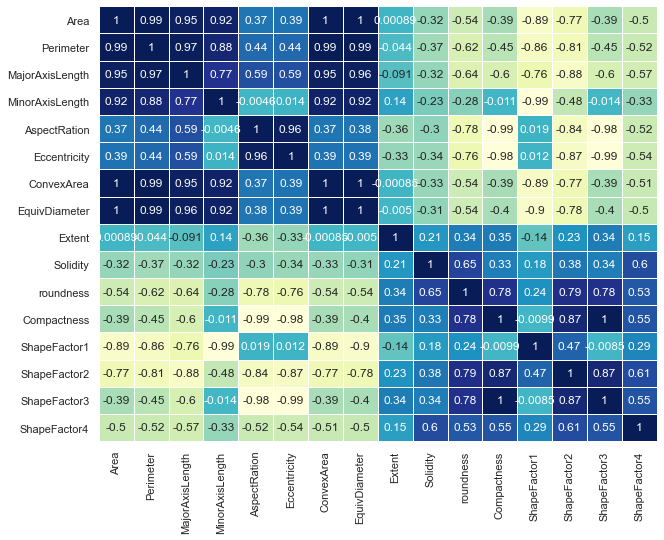

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

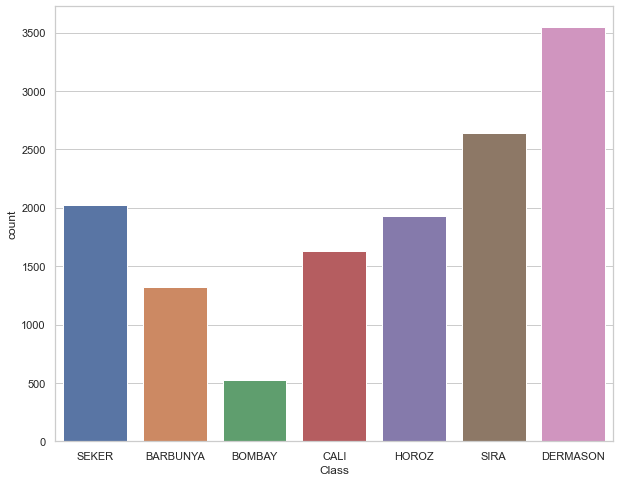

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(wine_df['Class']);

In [15]:
wine_df = wine_df[(wine_df['Class']=="SEKER") | (wine_df['Class']=="HOROZ")|  (wine_df['Class']=="CALI") ]

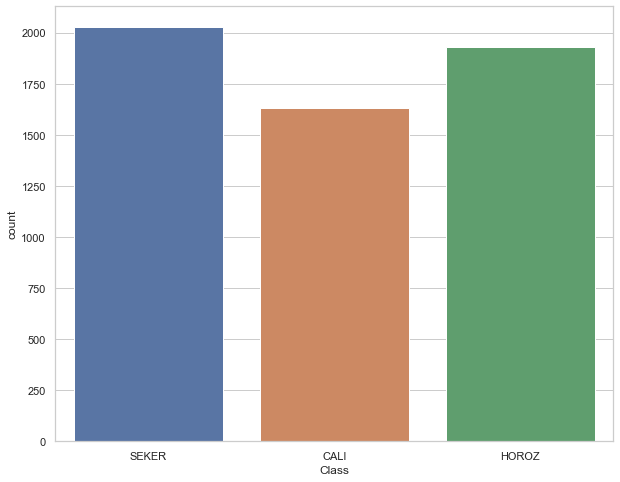

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(wine_df['Class']);

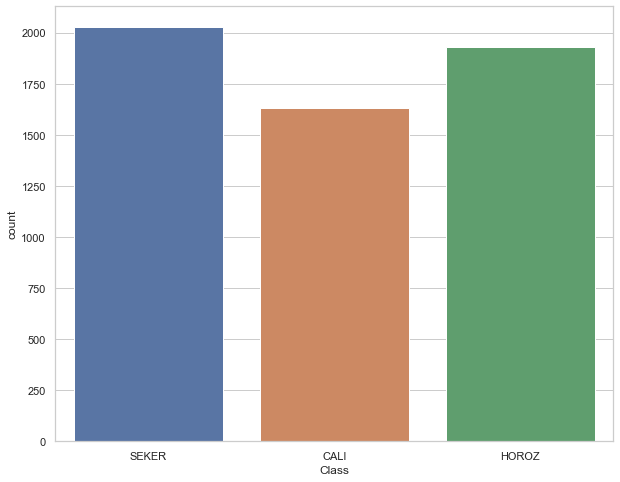

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(wine_df['Class']);

In [18]:

label_quality = LabelEncoder()

wine_df['Class'] = label_quality.fit_transform(wine_df['Class'])

In [19]:
# splitting data into training and test set for independent attributes

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('Class',axis=1), wine_df['Class'], test_size=.3,
                                                   random_state=22,stratify=wine_df['Class'])
X_train.shape,X_test.shape

((3909, 16), (1676, 16))

In [20]:

sm = SMOTE(random_state=14)
print("Before smote --> ", collections.Counter(y_train))
X_train, y_train = sm.fit_resample(X_train, y_train)
print("After smote --> ", collections.Counter(y_train))

Before smote -->  Counter({2: 1419, 1: 1349, 0: 1141})
After smote -->  Counter({0: 1419, 1: 1419, 2: 1419})


## Naive implementation of Machine learning algorithms. Without any cross validation and hyperparameter tuning. 

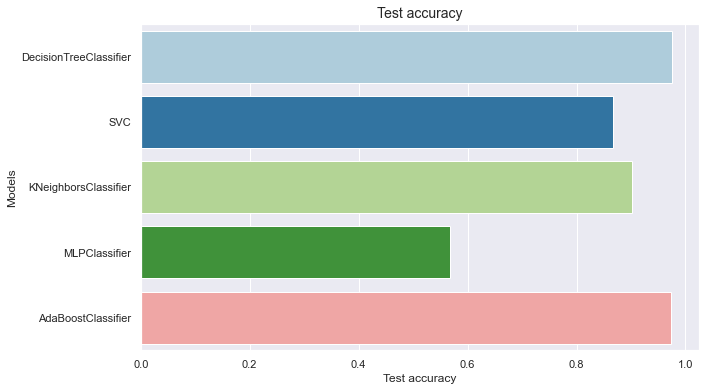

   Train accuracy                  Models
0        1.000000  DecisionTreeClassifier
1        0.862579                     SVC
2        0.926239    KNeighborsClassifier
3        0.590557           MLPClassifier
4        1.000000      AdaBoostClassifier


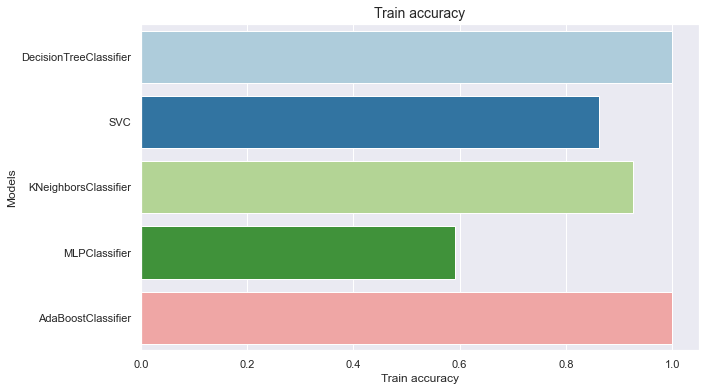

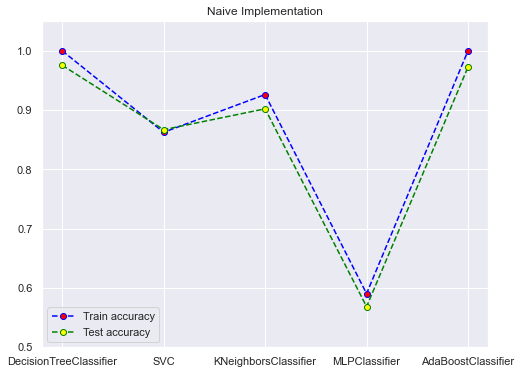

In [21]:

random_state = 42

import seaborn as sns
sns.set()

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),            
             KNeighborsClassifier(), MLPClassifier(random_state = random_state),AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state)) ]



cv_result = []
best_estimators = []
best_params = []
models_test_accuracy = []
models_train_accuracy = []
for i in range(len(classifier)):

    clf = classifier[i]
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 
    y_train_pred = clf.predict(X_train)
    
    models_test_accuracy.append(accuracy_score(y_pred,y_test))
    models_train_accuracy.append(accuracy_score(y_train_pred,y_train))
    

test_results_naive = pd.DataFrame({"Test accuracy":models_test_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Test accuracy", "Models", data = test_results_naive, palette = "Paired")
g.set_title("Test accuracy", size = 14)
g.set_xlabel("Test accuracy")
plt.show()

train_results_naive = pd.DataFrame({"Train accuracy":models_train_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
print(train_results_naive)
plt.figure(figsize = (10,6))
g = sns.barplot("Train accuracy", "Models", data = train_results_naive, palette = "Paired")
g.set_title("Train accuracy", size = 14)
g.set_xlabel("Train accuracy")
plt.show()


plt.figure(figsize =(8, 6))
plt.plot(train_results_naive['Models'], train_results_naive['Train accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Train accuracy")
plt.plot(test_results_naive['Models'], test_results_naive['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Test accuracy')
plt.legend()
plt.ylim(0.5,1.05)
plt.title("Naive Implementation")

plt.show()

## Parameter tuning implementation of Machine learning algorithms. Without any cross validation

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.977682979979367
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7392507020186139
Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.9276457412709709
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.7143931745585144
Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.9790922582104455
[DecisionTreeClassifier(max_depth=5, min_samples_split=15, random_state=42), SVC(C=2, gamma=0.001, random_state=42), KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance'), MLPClassifier(early_stopping=True, max_iter=300, random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=42,
                                                         splitter='random'),
                   n_estimators=2)]
[{'max_depth': 5, 'min_samples_split': 15}, {'C': 2, 'gamma': 0.001, 'kerne

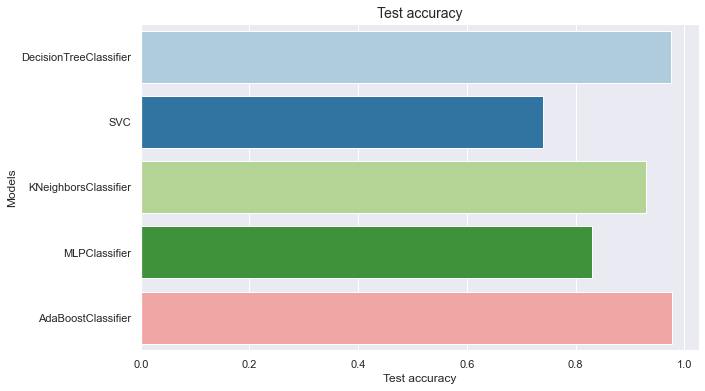

   Train accuracy                  Models
0        0.985671  DecisionTreeClassifier
1        1.000000                     SVC
2        1.000000    KNeighborsClassifier
3        0.827813           MLPClassifier
4        1.000000      AdaBoostClassifier


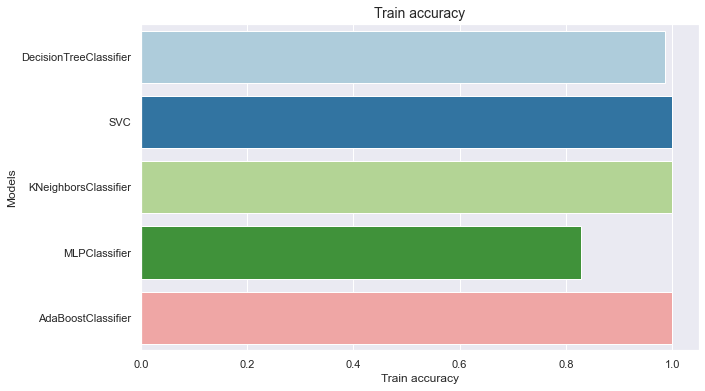

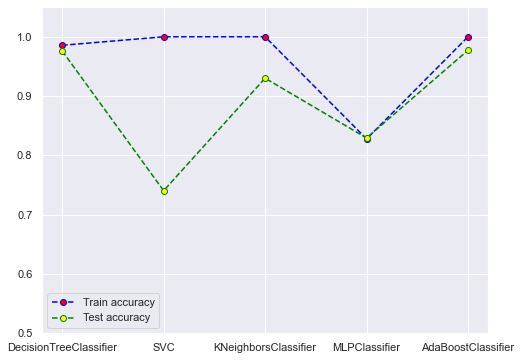

In [22]:

random_state = 42


classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),            
             KNeighborsClassifier(), MLPClassifier(random_state = random_state),AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state)) ]

dt_param_grid = {"min_samples_split" : [5,10,15,20],
                "max_depth": [2,5,10,20]}

svc_param_grid = {"kernel" : ['rbf'],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1,1, 2, 2.5, 10]}


knn_param_grid = {"n_neighbors": [10,15,20,25],
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

mlp_param_grid = {"max_iter":[300], "early_stopping": [True]}

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,5]
             }


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   knn_param_grid, mlp_param_grid, ada_param_grid
                  ]



cv_result = []
best_estimators = []
best_params = []
models_test_accuracy = []
models_train_accuracy = []

for i in range(len(classifier)):

    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    #print(clf.score)
    best_estimators.append(clf.best_estimator_)
    best_params.append(clf.best_params_)
    print(cv_result[i])
    
    y_pred = clf.predict(X_test) 
    
    y_train_pred = clf.predict(X_train)
    
    models_test_accuracy.append(accuracy_score(y_pred,y_test))
    models_train_accuracy.append(accuracy_score(y_train_pred,y_train))
    
    #print(classification_report(y_pred,y_test))


print(best_estimators)
print(best_params)


test_results_tuning = pd.DataFrame({"Test accuracy":models_test_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Test accuracy", "Models", data = test_results_tuning, palette = "Paired")
g.set_title("Test accuracy", size = 14)
g.set_xlabel("Test accuracy")
plt.show()

train_results_tuning = pd.DataFrame({"Train accuracy":models_train_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
print(train_results_tuning)
plt.figure(figsize = (10,6))
g = sns.barplot("Train accuracy", "Models", data = train_results_tuning, palette = "Paired")
g.set_title("Train accuracy", size = 14)
g.set_xlabel("Train accuracy")
plt.show()

plt.figure(figsize =(8, 6))
plt.plot(train_results_tuning['Models'], train_results_tuning['Train accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Train accuracy")
plt.plot(test_results_tuning['Models'], test_results_tuning['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Test accuracy')
plt.ylim(0.5,1.05)
plt.legend()

plt.show()

## Parameter tuning with cross validation of Machine learning algorithms. 

Fitting 30 folds for each of 250 candidates, totalling 7500 fits
0.9785471784958114
Fitting 30 folds for each of 64 candidates, totalling 1920 fits
0.7553024026512012
Fitting 30 folds for each of 40 candidates, totalling 1200 fits
0.941353953788088
Fitting 30 folds for each of 1 candidates, totalling 30 fits
0.7503978643100434
Fitting 30 folds for each of 8 candidates, totalling 240 fits
0.9764328454386451
[DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=42), SVC(C=10, degree=2, gamma=0.001, random_state=42), KNeighborsClassifier(metric='manhattan', n_neighbors=1), MLPClassifier(early_stopping=True, max_iter=300, random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=42),
                   n_estimators=2)]
[{'max_depth': 7, 'min_samples_split': 30}, {'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}, {'metric': 'manhattan', 'n_neighbors': 1, 'weigh

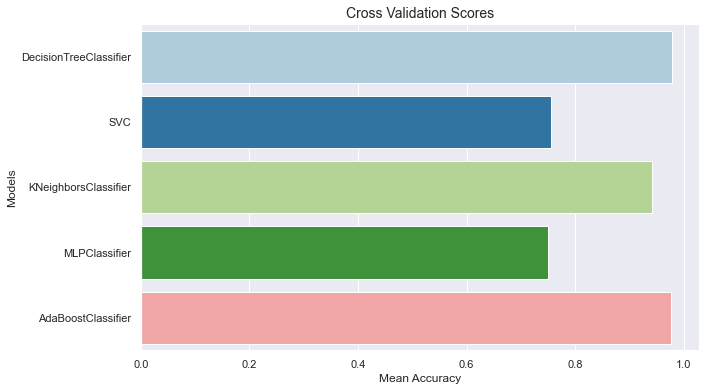

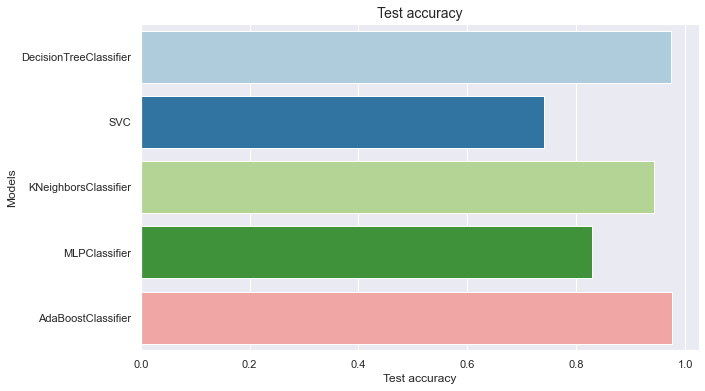

   Train accuracy                  Models
0        0.988255  DecisionTreeClassifier
1        1.000000                     SVC
2        1.000000    KNeighborsClassifier
3        0.827813           MLPClassifier
4        1.000000      AdaBoostClassifier


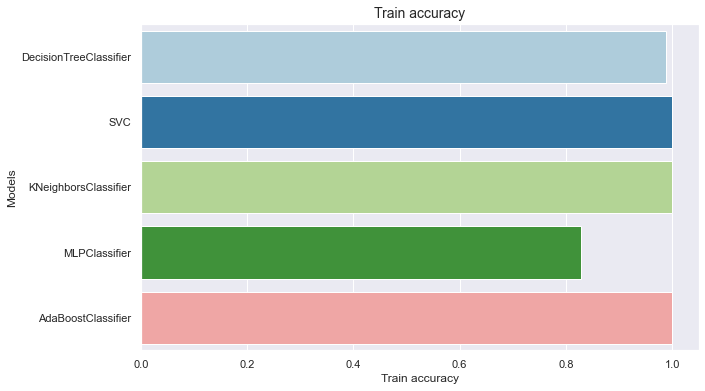

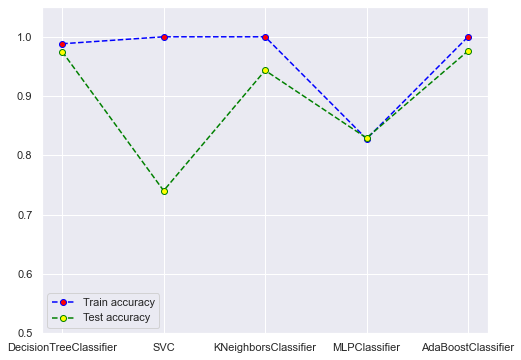

In [23]:
random_state = 42


classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),            
             KNeighborsClassifier(), MLPClassifier(random_state = random_state),AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state)) ]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ['rbf'],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1,1,10,50,100,200,300,1000],
                 "degree": [2,4]}


knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

mlp_param_grid = {"max_iter":[300], "early_stopping": [True]}

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   knn_param_grid, mlp_param_grid, ada_param_grid
                  ]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = StratifiedKFold(n_splits = 10)



cv_result = []
best_estimators = []
best_params = []
models_test_accuracy = []
models_train_accuracy = []

for i in range(len(classifier)):

    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = cv,
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    #print(clf.score)
    best_estimators.append(clf.best_estimator_)
    best_params.append(clf.best_params_)
    print(cv_result[i])
    
    y_pred = clf.predict(X_test) 
    
    y_train_pred = clf.predict(X_train)
    
    models_test_accuracy.append(accuracy_score(y_pred,y_test))
    models_train_accuracy.append(accuracy_score(y_train_pred,y_train))
    
    #print(classification_report(y_pred,y_test))


print(best_estimators)
print(best_params)

cv_results_tuning_cv = pd.DataFrame({"Cross Validation Means":cv_result, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Cross Validation Means", "Models", data = cv_results_tuning_cv, palette = "Paired")
g.set_title("Cross Validation Scores", size = 14)
g.set_xlabel("Mean Accuracy")
plt.show()

test_results_tuning_cv = pd.DataFrame({"Test accuracy":models_test_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Test accuracy", "Models", data = test_results_tuning_cv, palette = "Paired")
g.set_title("Test accuracy", size = 14)
g.set_xlabel("Test accuracy")
plt.show()

train_results_tuning_cv = pd.DataFrame({"Train accuracy":models_train_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
print(train_results_tuning_cv)
plt.figure(figsize = (10,6))
g = sns.barplot("Train accuracy", "Models", data = train_results_tuning_cv, palette = "Paired")
g.set_title("Train accuracy", size = 14)
g.set_xlabel("Train accuracy")
plt.show()

plt.figure(figsize =(8, 6))
plt.plot(train_results_tuning_cv['Models'], train_results_tuning_cv['Train accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Train accuracy")
plt.plot(test_results_tuning_cv['Models'], test_results_tuning_cv['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Test accuracy')
plt.ylim(0.5,1.05)
plt.legend()

plt.show()

Fitting 30 folds for each of 250 candidates, totalling 7500 fits
0.9785471784958114
Fitting 30 folds for each of 64 candidates, totalling 1920 fits
0.9852027984902884
Fitting 30 folds for each of 40 candidates, totalling 1200 fits
0.9853596612353862
Fitting 30 folds for each of 1 candidates, totalling 30 fits
0.9800347970173987
Fitting 30 folds for each of 8 candidates, totalling 240 fits
0.9764322931050355
[DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=42), SVC(C=50, degree=2, gamma=0.1, random_state=42), KNeighborsClassifier(metric='manhattan', weights='distance'), MLPClassifier(early_stopping=True, max_iter=300, random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   n_estimators=1)]
[{'max_depth': 7, 'min_samples_split': 30}, {'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}, {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}, {'early_stopping': True, 'max_iter': 300}, {'base_estimato

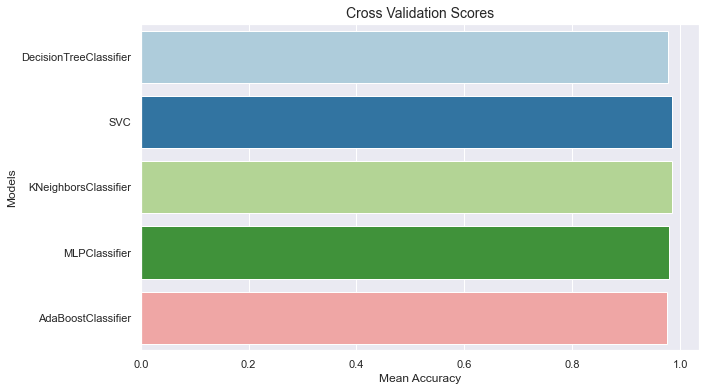

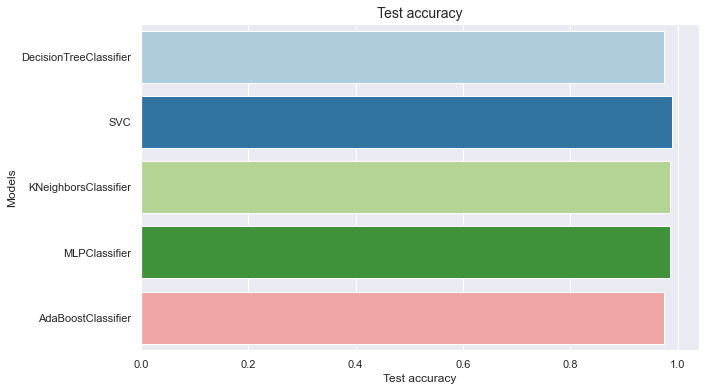

   Train accuracy                  Models
0        0.988255  DecisionTreeClassifier
1        0.991308                     SVC
2        1.000000    KNeighborsClassifier
3        0.981207           MLPClassifier
4        1.000000      AdaBoostClassifier


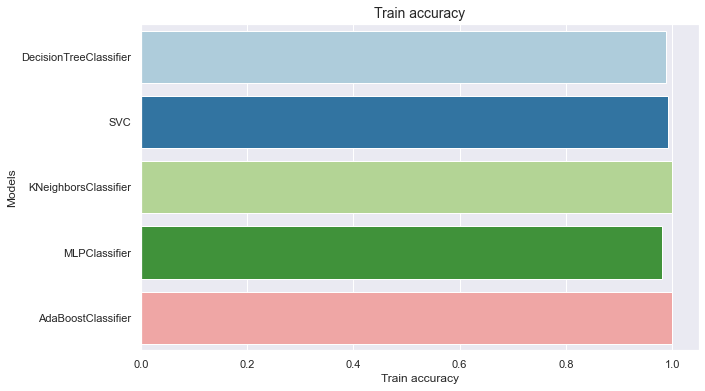

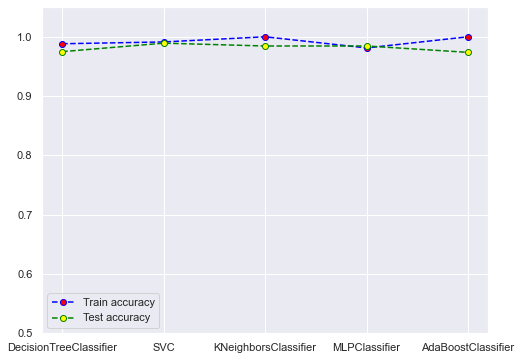

In [24]:
#Applying Standard scaling to get optimized result

#sc=RobustScaler()


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


random_state = 42


classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),            
             KNeighborsClassifier(), MLPClassifier(random_state = random_state),AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state)) ]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ['rbf'],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1,1,10,50,100,200,300,1000],
                 "degree": [2,4]}


knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

mlp_param_grid = {"max_iter":[300], "early_stopping": [True]}

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   knn_param_grid, mlp_param_grid, ada_param_grid
                  ]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = StratifiedKFold(n_splits = 10)



cv_result = []
best_estimators = []
best_params = []
models_test_accuracy = []
models_train_accuracy = []

for i in range(len(classifier)):

    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = cv,
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train_sc,y_train)
    cv_result.append(clf.best_score_)
    #print(clf.score)
    best_estimators.append(clf.best_estimator_)
    best_params.append(clf.best_params_)
    print(cv_result[i])
    
    y_pred = clf.predict(X_test_sc) 
    
    y_train_pred = clf.predict(X_train_sc)
    
    models_test_accuracy.append(accuracy_score(y_pred,y_test))
    models_train_accuracy.append(accuracy_score(y_train_pred,y_train))
    
    #print(classification_report(y_pred,y_test))


print(best_estimators)
print(best_params)

cv_results_tuning_scaling = pd.DataFrame({"Cross Validation Means":cv_result, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Cross Validation Means", "Models", data = cv_results_tuning_scaling, palette = "Paired")
g.set_title("Cross Validation Scores", size = 14)
g.set_xlabel("Mean Accuracy")
plt.show()

test_results_tuning_scaling = pd.DataFrame({"Test accuracy":models_test_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Test accuracy", "Models", data = test_results_tuning_scaling, palette = "Paired")
g.set_title("Test accuracy", size = 14)
g.set_xlabel("Test accuracy")
plt.show()

train_results_tuning_scaling = pd.DataFrame({"Train accuracy":models_train_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
print(train_results_tuning_scaling)
plt.figure(figsize = (10,6))
g = sns.barplot("Train accuracy", "Models", data = train_results_tuning_scaling, palette = "Paired")
g.set_title("Train accuracy", size = 14)
g.set_xlabel("Train accuracy")
plt.show()

plt.figure(figsize =(8, 6))
plt.plot(train_results_tuning_scaling['Models'], train_results_tuning_scaling['Train accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Train accuracy")
plt.plot(test_results_tuning_scaling['Models'], test_results_tuning_scaling['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Test accuracy')
plt.ylim(0.5,1.05)
plt.legend()

plt.show()

Fitting 30 folds for each of 16 candidates, totalling 480 fits
0.9783118843781645
Fitting 30 folds for each of 20 candidates, totalling 600 fits
0.9848896253337015
Fitting 30 folds for each of 16 candidates, totalling 480 fits
0.9847327625886034
Fitting 30 folds for each of 1 candidates, totalling 30 fits
0.9800347970173987
Fitting 30 folds for each of 12 candidates, totalling 360 fits
0.9767467550400443
[DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42), SVC(C=10, gamma=0.1, random_state=42), KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance'), MLPClassifier(early_stopping=True, max_iter=300, random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=42,
                                                         splitter='random'),
                   n_estimators=5)]
[{'max_depth': 5, 'min_samples_split': 5}, {'C': 10, 'gamma': 0.1, 

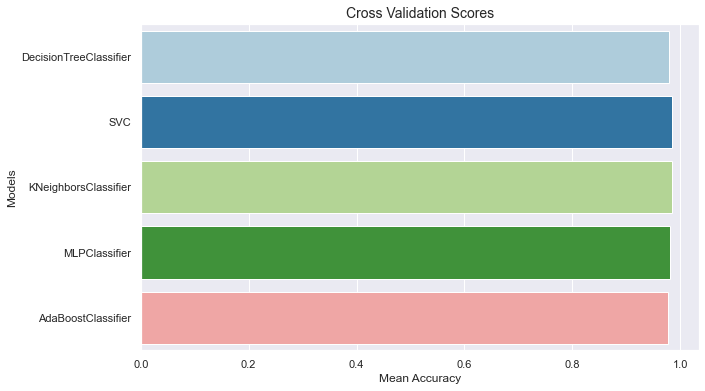

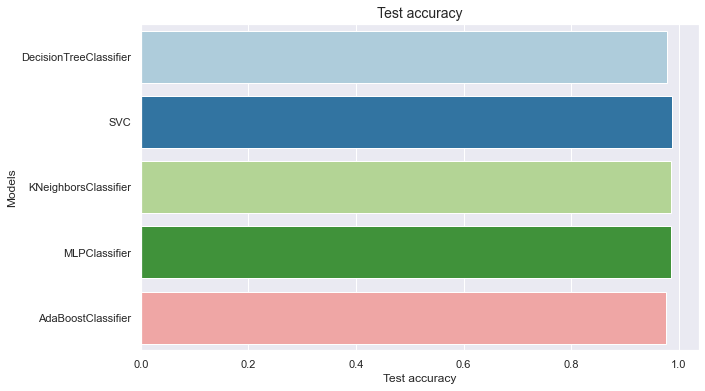

   Train accuracy                  Models
0        0.987315  DecisionTreeClassifier
1        0.987080                     SVC
2        1.000000    KNeighborsClassifier
3        0.981207           MLPClassifier
4        1.000000      AdaBoostClassifier


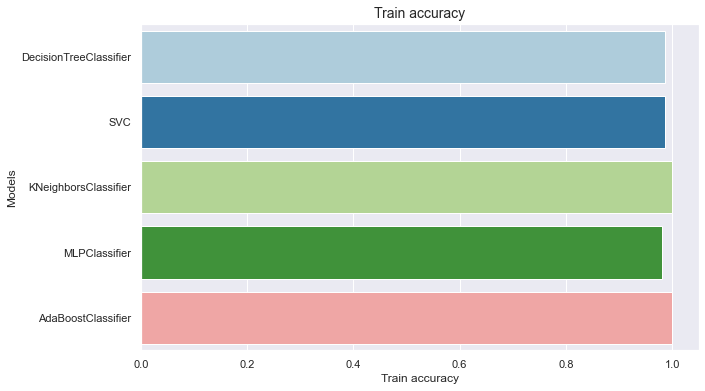

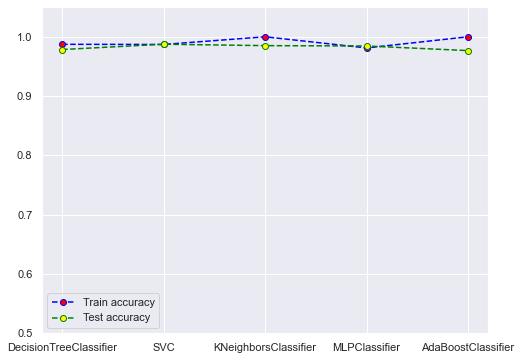

In [25]:
#Applying Standard scaling to get optimized result

#sc=RobustScaler()


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


random_state = 42


classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),            
             KNeighborsClassifier(), MLPClassifier(random_state = random_state),AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state)) ]

dt_param_grid = {"min_samples_split" : [5,10,15,20],
                "max_depth": [2,5,10,20]}

svc_param_grid = {"kernel" : ['rbf'],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1,1, 2, 2.5, 10]}


knn_param_grid = {"n_neighbors": [10,15,20,25],
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

mlp_param_grid = {"max_iter":[300], "early_stopping": [True]}

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,5]
             }



classifier_param = [dt_param_grid,
                   svc_param_grid,
                   knn_param_grid, mlp_param_grid, ada_param_grid
                  ]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = StratifiedKFold(n_splits = 10)



cv_result = []
best_estimators = []
best_params = []
models_test_accuracy = []
models_train_accuracy = []

for i in range(len(classifier)):

    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = cv,
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train_sc,y_train)
    cv_result.append(clf.best_score_)
    #print(clf.score)
    best_estimators.append(clf.best_estimator_)
    best_params.append(clf.best_params_)
    print(cv_result[i])
    
    y_pred = clf.predict(X_test_sc) 
    
    y_train_pred = clf.predict(X_train_sc)
    
    models_test_accuracy.append(accuracy_score(y_pred,y_test))
    models_train_accuracy.append(accuracy_score(y_train_pred,y_train))
    
    #print(classification_report(y_pred,y_test))


print(best_estimators)
print(best_params)

cv_results_tuning_scaling = pd.DataFrame({"Cross Validation Means":cv_result, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Cross Validation Means", "Models", data = cv_results_tuning_scaling, palette = "Paired")
g.set_title("Cross Validation Scores", size = 14)
g.set_xlabel("Mean Accuracy")
plt.show()

test_results_tuning_scaling = pd.DataFrame({"Test accuracy":models_test_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
plt.figure(figsize = (10,6))
g = sns.barplot("Test accuracy", "Models", data = test_results_tuning_scaling, palette = "Paired")
g.set_title("Test accuracy", size = 14)
g.set_xlabel("Test accuracy")
plt.show()

train_results_tuning_scaling = pd.DataFrame({"Train accuracy":models_train_accuracy, "Models":["DecisionTreeClassifier", "SVC",
             "KNeighborsClassifier", "MLPClassifier", "AdaBoostClassifier"
             ]})
print(train_results_tuning_scaling)
plt.figure(figsize = (10,6))
g = sns.barplot("Train accuracy", "Models", data = train_results_tuning_scaling, palette = "Paired")
g.set_title("Train accuracy", size = 14)
g.set_xlabel("Train accuracy")
plt.show()

plt.figure(figsize =(8, 6))
plt.plot(train_results_tuning_scaling['Models'], train_results_tuning_scaling['Train accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Train accuracy")
plt.plot(test_results_tuning_scaling['Models'], test_results_tuning_scaling['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Test accuracy')
plt.ylim(0.5,1.05)
plt.legend()

plt.show()

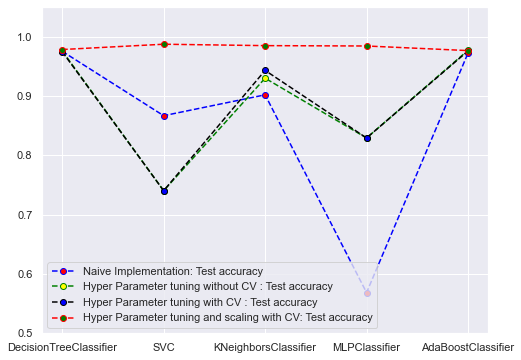

In [26]:
plt.figure(figsize =(8, 6))

plt.plot(test_results_naive['Models'], test_results_naive['Test accuracy'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Naive Implementation: Test accuracy")
plt.plot(test_results_tuning['Models'], test_results_tuning['Test accuracy'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = 'Hyper Parameter tuning without CV : Test accuracy')

plt.plot(test_results_tuning_cv['Models'], test_results_tuning_cv['Test accuracy'],color ='black',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='blue', label = 'Hyper Parameter tuning with CV : Test accuracy')


plt.plot(test_results_tuning_scaling['Models'], test_results_tuning_scaling['Test accuracy'],color ='red',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='green', label = 'Hyper Parameter tuning and scaling with CV: Test accuracy')


plt.ylim(0.5,1.05)
plt.legend()

plt.show()

In [27]:


from sklearn.neighbors import KNeighborsClassifier 

# For weights = 'uniform'
for n_neighbors in [1,5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights = 'uniform')
    model.fit(X_train_sc, y_train) 
    scr = model.score(X_test_sc, y_test)
    train_scr = model.score(X_train_sc, y_train)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)
    print(train_scr)
    

# For weights = 'distance'
for n_neighbors in [1,5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train_sc, y_train) 
    scr = model.score(X_test_sc, y_test)
    train_scr = model.score(X_train_sc, y_train)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)
    print(train_scr)



For n_neighbors =  1  score is  0.9779236276849642
1.0
For n_neighbors =  5  score is  0.986873508353222
0.9870801033591732
For n_neighbors =  10  score is  0.9850835322195705
0.9849659384543106
For n_neighbors =  15  score is  0.9856801909307876
0.9844961240310077
For n_neighbors =  20  score is  0.9844868735083532
0.984026309607705
For n_neighbors =  1  score is  0.9779236276849642
1.0
For n_neighbors =  5  score is  0.9862768496420048
1.0
For n_neighbors =  10  score is  0.983890214797136
1.0
For n_neighbors =  15  score is  0.9850835322195705
1.0
For n_neighbors =  20  score is  0.9856801909307876
1.0


In [28]:
from timeit import default_timer as timer

start = timer()
# ...
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282

2.7954999950452475e-05


0.7108117849999189
0.45215328699998736
0.49104137699998773


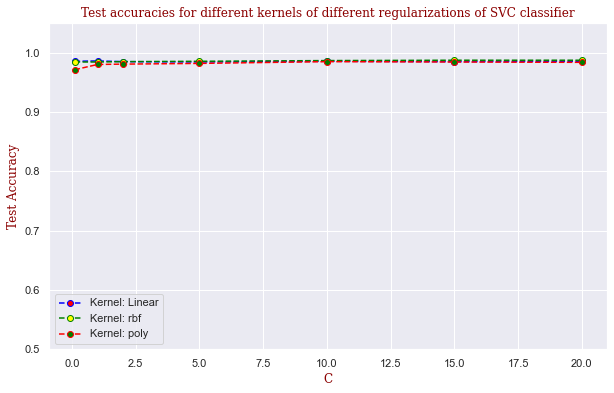

In [29]:


import seaborn as sns
sns.set()


lst = []

# For weights = 'uniform'
for kernel in ['rbf', 'linear', 'poly']:
    start = timer()
    for C in [0.1,1,2,5,10,15, 20]:
        model = SVC(kernel = kernel, C=C)
        model.fit(X_train_sc, y_train) 
        scr = model.score(X_test_sc, y_test)
        #print("For C = ", C  ," score is ",scr)
        lst.append([kernel, C, scr])
    end = timer()
    print(end - start) # Time in seconds, e.g. 5.38091952400282

svc_acc = pd.DataFrame(lst,columns = ['kernel', 'C', 'Test accuracy'])

plt.figure(figsize =(10, 6))

plt.plot(svc_acc['C'][svc_acc['kernel']=='linear'], svc_acc['Test accuracy'][svc_acc['kernel']=='linear'],color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "Kernel: Linear")

plt.plot(svc_acc['C'][svc_acc['kernel']=='rbf'], svc_acc['Test accuracy'][svc_acc['kernel']=='rbf'],color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow', label = "Kernel: rbf")


plt.plot(svc_acc['C'][svc_acc['kernel']=='poly'], svc_acc['Test accuracy'][svc_acc['kernel']=='poly'],color ='red',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='green', label = "Kernel: poly")


plt.xlabel("C", fontdict = font)
plt.ylabel("Test Accuracy", fontdict = font)
plt.title("Test accuracies for different kernels of different regularizations of SVC classifier", fontdict = font)

plt.ylim(0.5,1.05)
plt.legend()

plt.show()

Text(0, 0.5, 'Error Rate')

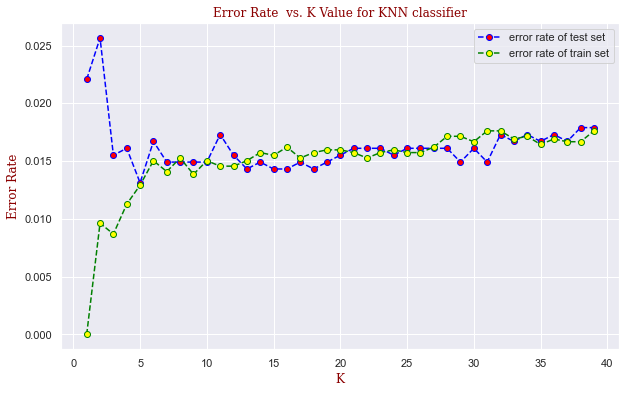

In [30]:

error_rate = []
train_error_rate=[]
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_sc, y_train)
    pred_i = knn.predict(X_test_sc)
    error_rate.append(np.mean(pred_i != y_test))

    train_pred_i = knn.predict(X_train_sc)
    train_error_rate.append(np.mean(train_pred_i != y_train))

    

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='red', label = "error rate of test set")

plt.plot(range(1, 40), train_error_rate, color ='green',
                linestyle ='dashed', marker ='o',
        markerfacecolor ='yellow',label = "error rate of train set")


plt.legend()
plt.title('Error Rate  vs. K Value for KNN classifier', fontdict = font)
plt.xlabel('K', fontdict = font)
plt.ylabel('Error Rate', fontdict = font)

#print(knn.get_params())

In [31]:
import seaborn as sns
sns.set()



lst = []

for hidden in [(10,10),(10,10,10),(50,50,50), (50,100,50), (50,50)]:
    model = MLPClassifier(random_state = random_state,hidden_layer_sizes = hidden)
    model.fit(X_train_sc, y_train) 
    scr = model.score(X_test_sc, y_test)
    scr_train = model.score(X_train_sc, y_train)
    print(scr_train)
    print(scr)
    


0.984026309607705
0.9832935560859188
0.9859055673009162
0.9826968973747017
0.9990603711533944
0.9862768496420048
0.9981207423067888
0.9844868735083532
0.9943622269203665
0.9821002386634845


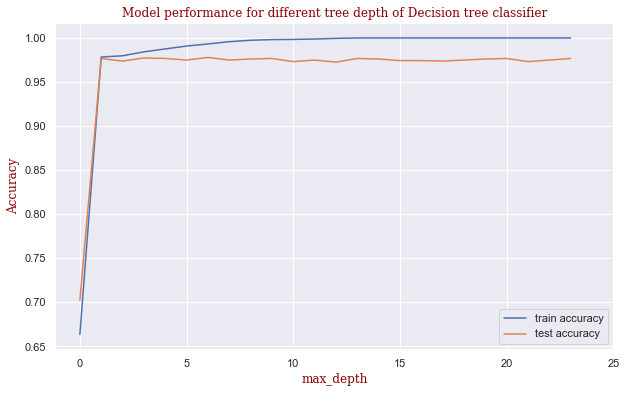

In [32]:
train_accuracies=[]
test_accuracies=[]
for depth in range(1, 25):
    # init the model
    clf = DecisionTreeClassifier(max_depth=depth)
    # fit the model on given features
    clf.fit(X_train, y_train)
    # create training & test predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    y_train, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    y_test, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
#plt.figure(figsize=(10, 5))
#sns.set_style("whitegrid")
plt.figure(figsize =(10, 6))
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="lower right")
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth",fontdict = font)
plt.ylabel("Accuracy", fontdict = font)
plt.title("Model performance for different tree depth of Decision tree classifier", fontdict = font)
plt.show()

In [33]:
print(train_accuracies)

[0.6636128729151985, 0.9783885365280715, 0.9797979797979798, 0.9842612168193563, 0.9875499177824759, 0.9908386187455955, 0.9931876908621095, 0.9957716701902748, 0.9974160206718347, 0.9981207423067888, 0.9983556495184402, 0.998825463941743, 0.9995301855766971, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


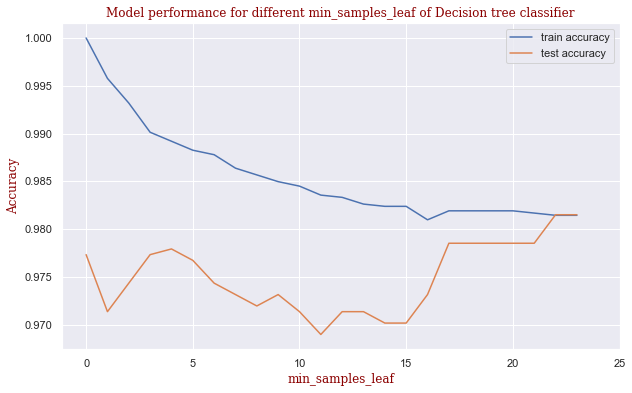

In [34]:


train_accuracies=[]
test_accuracies=[]
for min_samples_leaf in range(1, 25):
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    train_accuracy = metrics.accuracy_score(
    y_train, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    y_test, test_predictions
    )

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
plt.figure(figsize =(10, 6))
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper right")
plt.xticks(range(0, 26, 5))
plt.xlabel("min_samples_leaf",fontdict = font)
plt.ylabel("Accuracy", fontdict = font)
plt.title("Model performance for different min_samples_leaf of Decision tree classifier", fontdict = font)
plt.show()

In [35]:

param_grid = {'n_neighbors':np.arange(1,50), 'weights':['uniform','distance'], 'leaf_size':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

{'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
0.9109685925974965
0.9146778042959427
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       497
           1       0.87      0.88      0.88       573
           2       0.94      0.95      0.95       606

    accuracy                           0.91      1676
   macro avg       0.91      0.91      0.91      1676
weighted avg       0.91      0.91      0.91      1676



In [36]:
## pruned decision tree

clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

preds = clf_pruned.predict(X_test)
preds_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds))
print(accuracy_score(y_train,preds_train))


target_names = ['class 0', 'class 1', 'class2']
print(classification_report(y_test, preds, target_names=target_names))

print(confusion_matrix(y_test, preds))


0.9731503579952268
0.9795630725863284
              precision    recall  f1-score   support

     class 0       0.97      0.95      0.96       489
     class 1       0.95      0.98      0.96       579
      class2       1.00      0.98      0.99       608

    accuracy                           0.97      1676
   macro avg       0.97      0.97      0.97      1676
weighted avg       0.97      0.97      0.97      1676

[[464  25   0]
 [  9 570   0]
 [  3   8 597]]


Automatically created module for IPython interactive environment


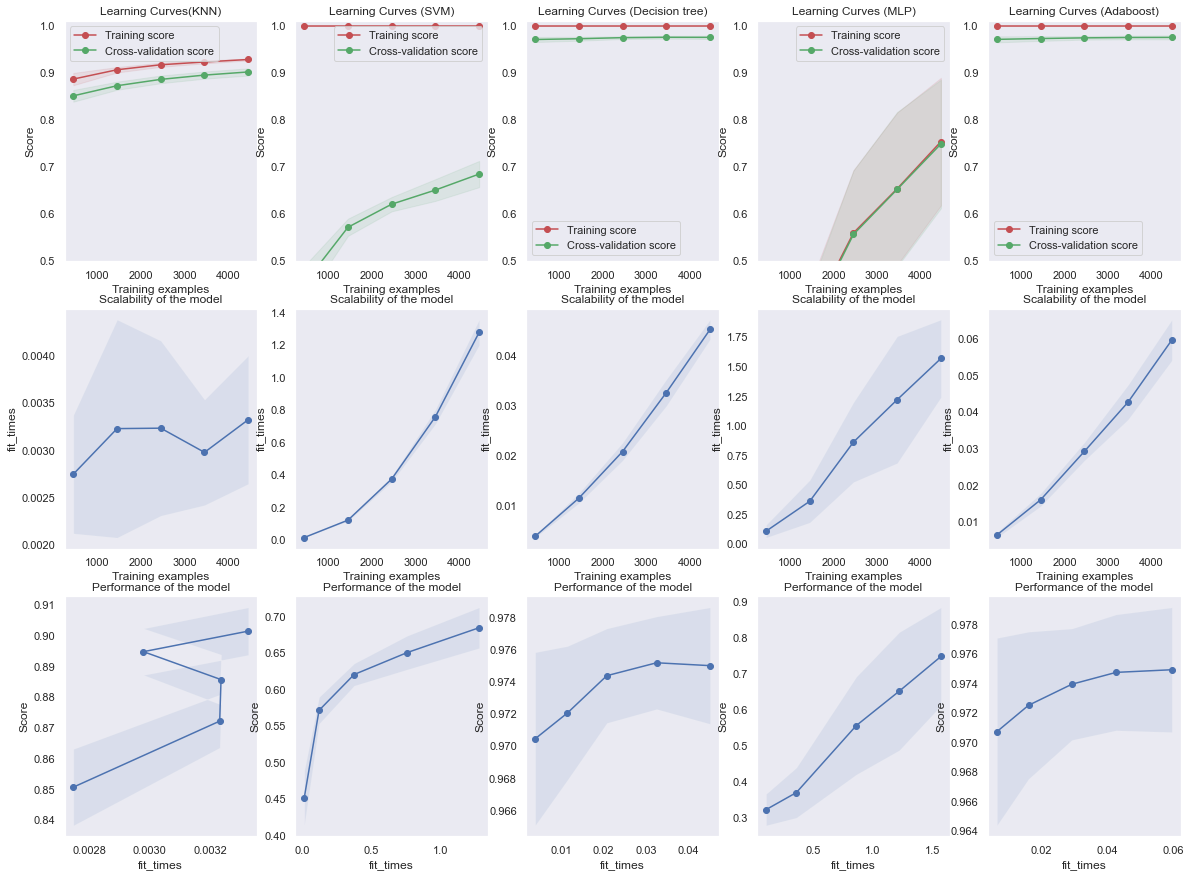

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 5, figsize=(20, 15))

#X, y = load_digits(return_X_y=True)

features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
target = 'Class'
    
X,y = wine_df[features], wine_df[target]

title = "Learning Curves(KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)



title = r"Learning Curves (Decision tree)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(random_state = random_state)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

#title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

title = r"Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier(random_state = random_state)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Adaboost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state))
plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()